<font size=6> 1D Simple model\
<font size=5> Parameter test

In [1]:
# import Classes and helper functions
%run Helper_functions.ipynb
%run Classes.ipynb
%matplotlib inline

import scipy.stats as st
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Could not find RADAR5
Could not find GLIMDA


100.0000%               
Variable:                      
Steady state reached at:       t=1611
Lowest auxin concentration:    0.5260904322076713
no. auxin peaks:               2
avg. peak height:              14.33440696007319
avg. peak distance:            25.0
avg. peak width:               7.0



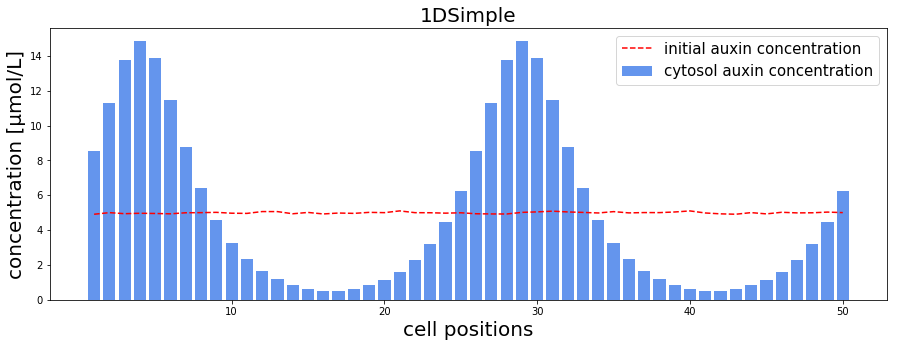

In [2]:
# model type
mode="1d"

# total cells
n=50

# neighbours per cell (2 for 1D)
k=2

# auxin and PIN initial base concentration
auxin=5
pin=40

# integration time
time=100000

# base auxin and pin with random noise
noise=.01

# initial distribution (seed for comparability)
np.random.seed(2020)

# auxin
aux = [auxin for i in range(n)] + np.random.normal(0,auxin*noise,n)

# PINs (both sides)
pin_left = [pin for i in range(n)] + np.random.normal(0,pin*noise,n)
pin_right = [2*pin-x for x in pin_left] 

# initial values per cell
start=np.concatenate((aux, pin_left, pin_right))

# periodic boundary condition
PBC=1

# class initiation
model=Mod1D(n,k,PBC)


# model parameter

# auxin degredation/synthesis rate to A
model.Ga=.01 

# auxin base level of synthesis (steady state)
model.A=5

# auxin diffusion rate to equilibrium
model.Da=100 

# pin degredation/synthesis rate to p
model.Gp=1 

# pin base level of synthesis (steady state)
model.p=40 

# factor of regulatory function phi
model.m=2 

# pin efflux efficiency
model.Ep=1 

R0=model.intgr(time,start)
info(R0,n,"","")
Show(mode,R0,n)

<font size=5> Standard condition\
<font size=4> This will show the reference simulation conditions for this model.
Values for parameters and compartments are not evaluated and this model serves only as a representable simulation.  
Detailed Information on classes and helper functions can be found in the associated [Gitlab-wiki]("https://gitlab.com/Fe_Ris/master-files/-/wikis/General).

<font size=5> Cell number

In [ ]:
mode="1d"
N=[8,9,10,20,50,100]
Data_cn=[]

for i,n in enumerate(N):    
    start=initial(mode,n,auxin,pin,Noise=noise)
    model=Mod1D(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_cn.append(info(R,n,"n=",n,mode))
    Show(mode,R,n,title=["Fig 1.{}: n = ".format(i+1),n])
show_data(Data_cn,N,"N")

- by a minimum of 9 cells, the effect of the process can be seen in the steady state.\
- like expected, the global minimum is below the auxin "base" concentration and the global maximum above.

<font size=5> Initial Values

In [ ]:
mode="1d"
n=50
auxin=[1,5,10,20,50]
pin=[0,1,5,10,50,100]
Data_iva=[]
Data_ivp=[]

for i,a in enumerate(auxin):
    start=initial(mode,n,a,40,noise)
    model=Mod1D(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_iva.append(info(R,n,"auxin=",a,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 2.{}: auxin = ".format(i),a))
show_data(Data_iva,auxin,"auxin")
    
for i,p in enumerate(pin):
    start=initial(mode,n,5,p,noise)
    model=Mod1D(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_ivp.append(info(R,n,"pin=",p,mode))
    Show(mode,R,n,yrange=16,title=("Fig. 2.{}: pin = ".format(i+1),p))
show_data(Data_ivp,pin,"pin")

- The change of the initial concentrations of auxin or pin shows no significant effect in the model.

<font size=5> Noise effect on initial auxin concentration

In [ ]:
mode="1d"
#seed=2020
seed=2021
n=50
auxin=5
pin=40
noise=[0.01,0.05,0.1,0.2,0.5]
Data_noi=[]

for i,noi in enumerate(noise):
    start=initial(mode,n,auxin,pin,noi,seed=seed)
    model=Mod1D(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_noi.append(info(R,n,"noise=",noi,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 3.{}: noise = ".format(i+1),str(noi*100)+"%"))
show_data(Data_noi,noise,"noise (%)")

 - Initial noise in auxin distribution shows only unsignificant changes.\
(Seed 2020: Increase of noise over 5% in a 50-cell model shows unnormal behavior)

<font size=5> Boundary condition

In [ ]:
mode="1d"
n=50
auxin=5
pin=40
noise=0.01
pbc_modes=["cutoff","PBC","zero-flux"]
Data_bc=[]

for pbc in range(3):
    start=initial(mode,n,auxin,pin,noise)
    model=Mod1D(n,k,PBC=pbc,progress=0)
    R=model.intgr(time,start)
    Data_bc.append(info(R,n,pbc_modes[pbc]+"=",pbc,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 4.{}: ".format(pbc+1),pbc_modes[pbc]))

<font size=5> Source/Sink behavior\
<font size=4> (external reduce/increase of auxin in at least one cell of the model)

In [ ]:
mode="1d"
n=50
auxin=5
pin=40
noise=0.01
PBC=1
Data_ss=[]

SinkSource=[[25,-3],[25,-.1],[25,.1],[25,5]]
for i,ss in enumerate(SinkSource):
    start=initial(mode,n,auxin,pin,noise)
    model=Mod1D(n,k,PBC,progress=0)
    model.sinksource=[ss]
    R=model.intgr(time,start)
    Data_ss.append(info(R,n,"Source,Sink=",ss,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 4.{}: Source,Sink = ".format(i+1),ss))
    

- sink (-3>x>0) creates minimum, source (0<x) creates maximum
- lower sink values show unexpected behavior
- higher source values only increas peak height at their location
- if sink and source available:
    - location not always generates peak/minimum
    - distance between sink and source show very diverse outcomes
- Boundary effects:
    - central peak with "cutoff" boundary mostly unaffected
    - if distance high enough with "zero-flux" boundary, peak can generate between source and sink

<font size=5> Parameter values

In [ ]:
np.random.seed(2020)
mode="1d"
n=50
auxin=5
pin=40
noise=0.01
PBC=1
start=initial(mode,n,auxin,pin,noise)
model=Mod1D(n,k,PBC,progress=0)

<font size=4> *A* (auxin base level):

In [ ]:
model.set_standard()
Data_A=[]
A=range(1,11)

for i,a in enumerate(A):
    model.A=a
    R=model.intgr(time,start)
    Data_A.append(info(R,n,"A=",a,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 5.{}: A = ".format(i+1),a))
show_data(Data_A,A,"A")

In [ ]:
# correlation between auxin base level and Peak height (APh_corr)

P_corr=st.pearsonr(A,np.array(Data_A)[:,3])
print("A_Ph_corr: "+str(P_corr[0]))

<font size=4> *Ga* (auxin degredation/synthesis coefficient):

In [ ]:
model.set_standard()
Data_Ga=[]
Ga=np.arange(0.05,2.55,.05)

for i,ga in enumerate(Ga):
    model.Ga=ga
    R=model.intgr(time,start)
    Data_Ga.append(info(R,n,"Ga=",ga,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 6.{}: Ga = ".format(i+1),ga),noplot=0)
    
show_data(Data_Ga,Ga,"Ga",everyx=20)

- increase of peak number between 1.4 and 1.5
- significant fall of duration to steady state before
- peak height reaches 0 at around 2.5

<font size=4> *Da* (diffusion coefficient)

In [ ]:
model.set_standard()
# Data_Da=[]
Da=range(0,120,2)

for i,da in enumerate(Da):
    model.Da=da
    R=model.intgr(time,start)
    Data_Da.append(info(R,n,"Da=",da,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 7.{}: Ga = ".format(i+1),da),noplot=1)
   
show_data(Data_Da,Da,"Da",everyx=10)

- "noise" after ~120 -> "min auxin" reaches base level and "avg. peak height" decreased to 0
- peak number decreases and peak width and peak distance increases -> peaks flatten out
- fluctuation in peak height -> unregular pattern

<font size=4> *Ep* (PIN efficiency)\
    (should be between 0 and 1; important coefficient to regulate PIN flux)

In [ ]:
model.set_standard()
D_d_ep=[]
Data_Ep=[]
Ep=np.arange(0,1,.1)

for d in range(0,2):
    Data_Ep=[]
    model.Da=d
    for i,ep in enumerate(Ep):
        model.Ep=ep
        R=model.intgr(time,start)
        Data_Ep.append(info(R,n,"Ep,Da=",[ep,d],mode))
        Show(mode,R,n,yrange=0,title=("Fig. 8.{}: Ep,Da = ".format(i+1),[ep,d]),noplot=0)
    
    show_data(Data_Ep,Ep,"Ep",everyx=10)  
D_d_ep.append(Data_Ep)

- minimum value where peak heights start increasing [ph0] is dependent diffusion coefficient [d] -> (ph0=d/100-0.1)

In [ ]:
model.set_standard()
Data_ap=[]
Data_p=[]
P=range(20,81,10)

for a in range(1,11):
    Data_p=[]
    model.A=a
    for i,p in enumerate(P): 
        model.p=p
        R=model.intgr(time,start)
        Data_p.append(info(R,n,"p=",p,mode))
        Show(mode,R,n,yrange=0,title=("Fig. 9.{}: a,p = ".format(i+1),[a,p]),noplot=0)
    show_data(Data_p,P,"p")
Data_ap.append(Data_p)

- most significant change between 30 and 40 (incr. height,equal/decr. distance,incr. peaks)
- not strongly affected by A (only gradually incr. of peak height)

<font size=4> *Gp* (PIN synthesis/degradation coefficient)

In [ ]:
model.set_standard()
Data_Gp=[]
Gp=np.arange(.01,.51,.02)

for gp in Gp:
    model.Gp=gp
    R=model.intgr(time,start)
    Data_Gp.append(info(R,n,"Gp=",gp,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 10.{}: Gp = ".format(i+1),gp),noplot=1)
show_data(Data_Gp,Gp,"Gp")

- peak incr. between 0.74 and 0.75
- only very low increase  of height and low. auxin over 5 (maybe lower)

<font size=4> *m* (PIN regulation coefficient)

In [ ]:
model.set_standard()
Data_m=[]
M=np.arange(3.6,3.71,.01)

for i,m in enumerate(M):
    model.m=m
    R=model.intgr(time,start)
    Data_m.append(info(R,n,"m=",m,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 11.{}: m = ".format(i+1),m),noplot=0)
show_data(Data_m,M,"m",everyx=1)

- "first" peaks after 1.7
- peaks change from 3 to 4 between 3.6 and 3.7
- observable decrease in duration to steady state
- no significant effects after 4